In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != "/device:GPU:0":
  raise SystemError("No GPU")
print(device_name)

/device:GPU:0


In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import pandas as pd
import json
data0725 = pd.read_csv("ptt_stock_analysis_result725ok.csv")
pushes = json.loads(data0725["Pushes"][0])
data0725_pushes = pd.DataFrame(pushes).T

In [8]:
!pip install -U ckiptagger[tf,gdown]

In [6]:
from PTTScraper import PTTScraper

board = "Gossiping"
scraper = PTTScraper(board)
data = scraper.get_data_days_before(2, max_posts=1000)

2023-10-19 00:00:00
文章總篇數: 15
2023-10-19 00:00:00
文章總篇數: 35
2023-10-19 00:00:00
文章總篇數: 55
2023-10-19 00:00:00
文章總篇數: 74
2023-10-19 00:00:00
文章總篇數: 93
2023-10-19 00:00:00
文章總篇數: 113
2023-10-19 00:00:00
文章總篇數: 132
2023-10-19 00:00:00
文章總篇數: 152
2023-10-19 00:00:00
文章總篇數: 172
2023-10-19 00:00:00
文章總篇數: 192
2023-10-19 00:00:00
文章總篇數: 212
2023-10-19 00:00:00
文章總篇數: 231
2023-10-19 00:00:00
文章總篇數: 251
2023-10-19 00:00:00
文章總篇數: 271
2023-10-19 00:00:00
文章總篇數: 291
2023-10-19 00:00:00
文章總篇數: 310
2023-10-19 00:00:00
文章總篇數: 330
2023-10-19 00:00:00
文章總篇數: 349
2023-10-19 00:00:00
文章總篇數: 369
2023-10-19 00:00:00
文章總篇數: 389
2023-10-19 00:00:00
文章總篇數: 407
2023-10-19 00:00:00
文章總篇數: 427
2023-10-19 00:00:00
文章總篇數: 445
2023-10-19 00:00:00
文章總篇數: 464
2023-10-19 00:00:00
文章總篇數: 484
2023-10-19 00:00:00
文章總篇數: 504
2023-10-19 00:00:00
文章總篇數: 524
2023-10-19 00:00:00
文章總篇數: 544
2023-10-19 00:00:00
文章總篇數: 564
2023-10-19 00:00:00
文章總篇數: 583
2023-10-19 00:00:00
文章總篇數: 602
2023-10-19 00:00:00
文章總篇數: 622
2023-10-19 00

In [9]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER

In [ ]:
data_utils.download_data_gdown("./")
# data_utils.download_data_url("./")

Downloading...
From: https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
To: /content/drive/MyDrive/data.zip
100%|██████████| 1.88G/1.88G [00:31<00:00, 60.4MB/s]


In [10]:
ws = WS("./data/", disable_cuda=False)
pos = POS("./data/", disable_cuda=False)
ner = NER("./data/", disable_cuda=False)

/usr/local/lib/python3.10/dist-packages/ckiptagger/model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
/usr/local/lib/python3.10/dist-packages/ckiptagger/model_pos.py:56: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
/usr/local/lib/python3.10/dist-packages/ckiptagger/model_ner.py:57: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)


In [11]:
import pandas as pd

df = pd.DataFrame(data)
sentence_list = df.Content
# sentence_list = list(data0725_pushes.Content)
word_sentence = ws(sentence_list)
pos_sentence = pos(word_sentence)
entity_sentence = ner(word_sentence, pos_sentence)

In [ ]:

# def print_word_pos_sentence(word_sentence, pos_sentence):
#     assert len(word_sentence) == len(pos_sentence)
#     for word, pos in zip(word_sentence, pos_sentence):
#         print(f"{word}({pos})", end="\u3000")
#     print()
#     return

# for i, sentence in enumerate(sentence_list):
#     print()
#     print(f"'{sentence}'")
#     print_word_pos_sentence(word_sentence[i],  pos_sentence[i])
#     for entity in sorted(entity_sentence[i]):
#         print(entity)

In [15]:
count_list = []
for e in entity_sentence:
  for i in e:
    if i[2] != "DATE" and i[2] != "CARDINAL":
      count_list.append(i[3])


In [17]:
df = pd.DataFrame(count_list, columns=["entity"])
df.entity.value_counts().head(30)

台灣       684
美國       468
以色列      353
民進黨      317
中國       252
國民黨      251
柯文哲      232
賴清德      197
日本       131
巴勒斯坦     126
加薩       114
第一       109
哈瑪斯       92
台北        89
民眾黨       82
約旦        81
台灣人       77
兩岸        72
高雄        64
埃及        60
巴勒斯坦人     58
台積電       56
中華民國      56
美         56
加薩走廊      54
羅森柏格      52
中共        50
台南        49
英文        49
巴         48
Name: entity, dtype: int64

In [24]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# !wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip"
# !unzip "NotoSansCJKtc-hinted.zip"

text = " ".join(word for word in count_list)
wordcloud = WordCloud(width=1200, height=600, max_font_size=200, max_words=200, background_color="black",
                      font_path='NotoSansCJKtc-Regular.otf', colormap="Dark2").generate(text)
plt.figure(dpi=600)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [25]:
import pandas as pd
import json
data0725 = pd.read_csv("ptt_stock_analysis_result725ok.csv")
pushes = json.loads(data0725["Pushes"][0])
data0725_pushes = pd.DataFrame(pushes).T

In [28]:
import yfinance as yf
from datetime import datetime

start = datetime(2023, 10, 11, 9, 0, 0)
end = datetime(2023, 10, 11, 13, 30, 0)

In [29]:
twii = yf.download(tickers="^TWII", interval="1m", start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


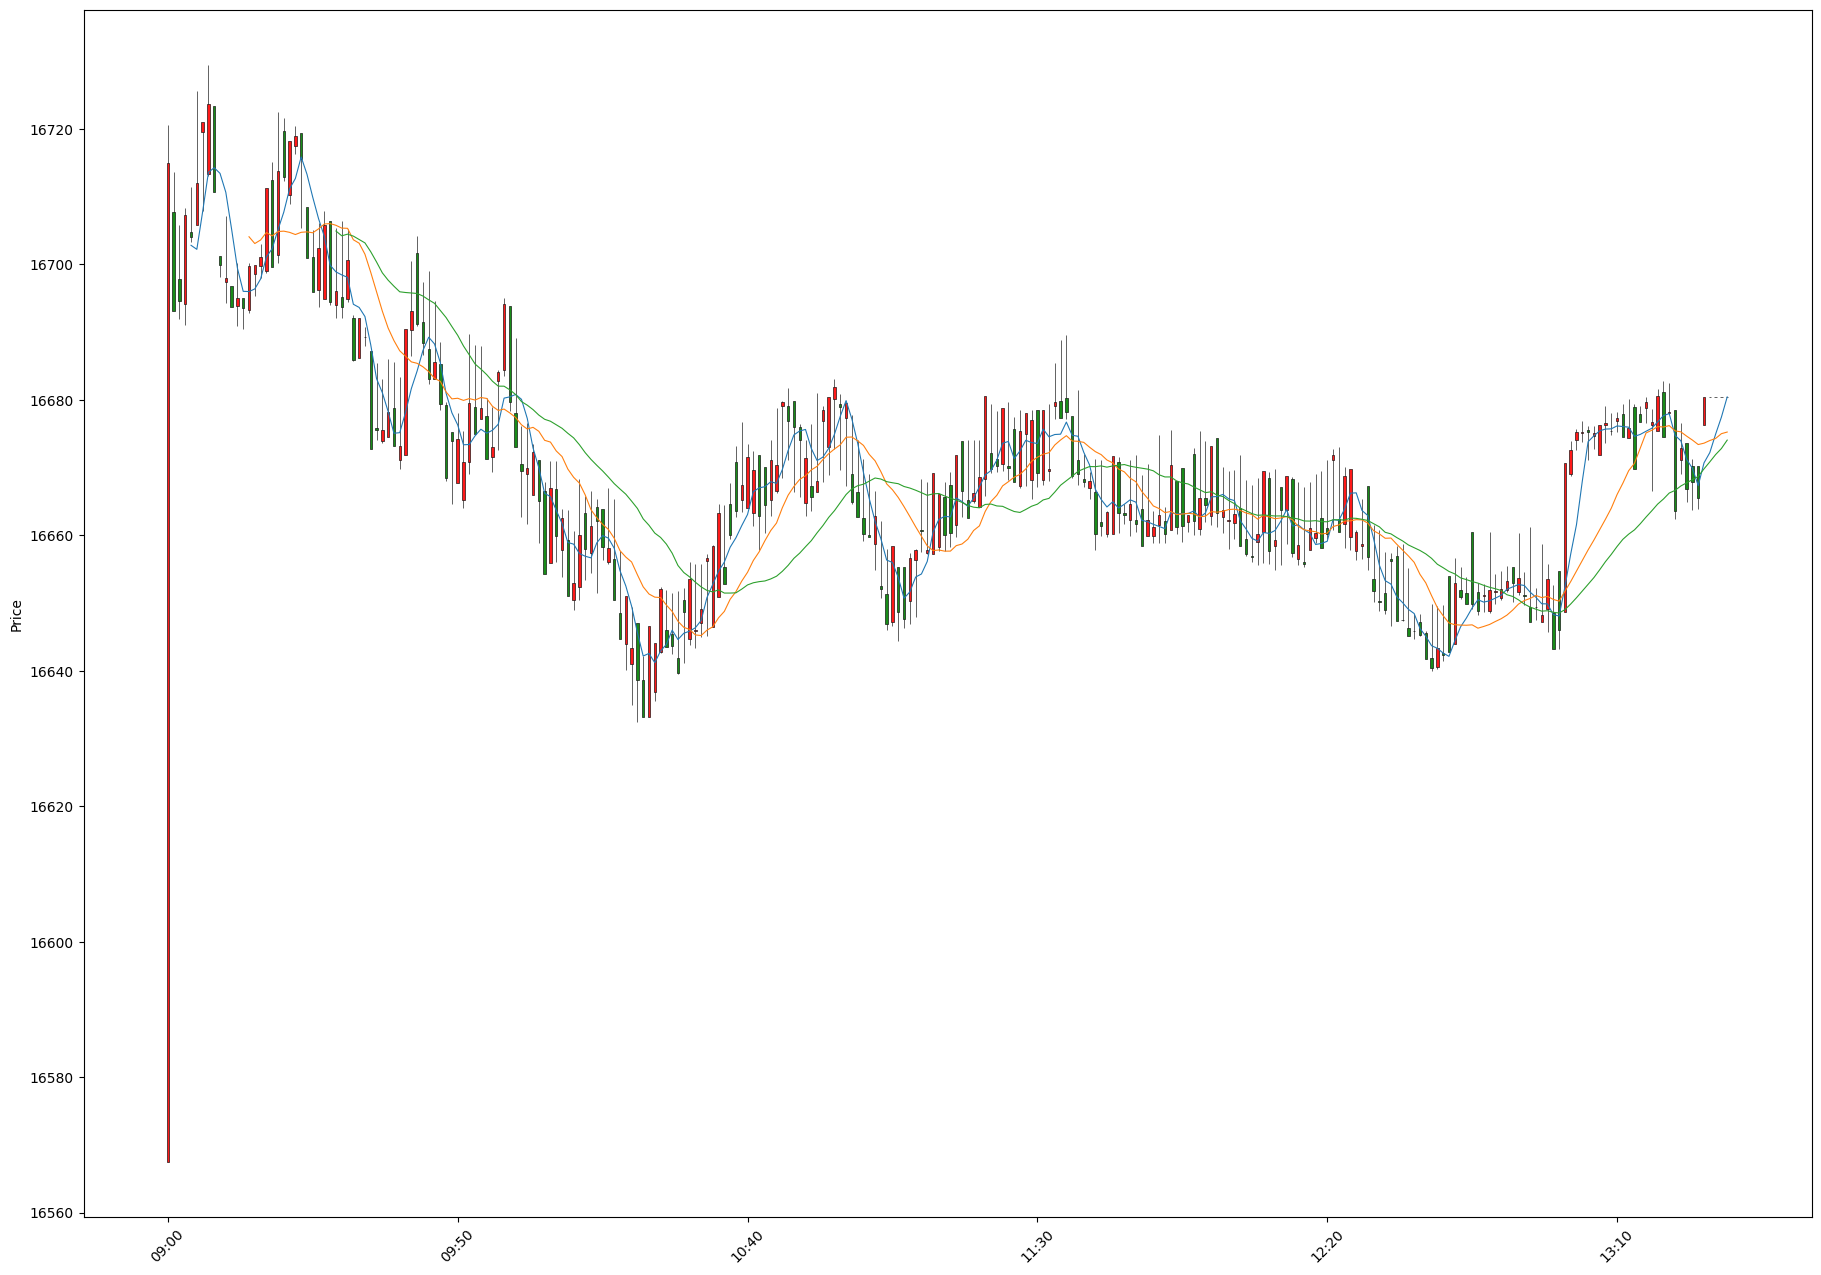

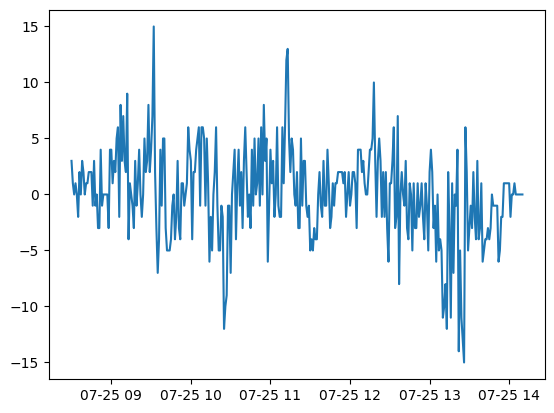

In [47]:
# !pip install mplfinance
import mplfinance as mpf

mc = mpf.make_marketcolors(up="r", down="g")
style = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(twii, type="candle", style=style, mav=(5, 15, 30), figscale=3)

plt.show()

In [38]:
sentiment_dict = {"positive": 1, "neutral": 0, "negative": -1}
data0725_pushes["sentiment_score"] = data0725_pushes.Sentiment.replace(sentiment_dict)

In [40]:
data0725_pushes["Ipdatetime"] = "2023/" + data0725_pushes.Ipdatetime

In [42]:
data0725_pushes["Ipdatetime"] = pd.to_datetime(data0725_pushes["Ipdatetime"], format="%Y/%m/%d %H:%M")

In [46]:
data_sentiment = data0725_pushes.groupby(pd.Grouper(key="Ipdatetime", freq="1T"))["sentiment_score"].sum()

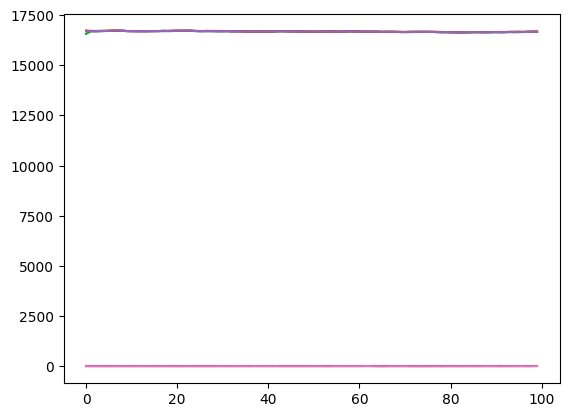

In [51]:
plt.plot(range(100), twii[:100])
plt.plot(range(100), data_sentiment[:100])
plt.show()

In [55]:
import numpy as np
np.corrcoef(twii["Close"][:100], data_sentiment[30:130])

array([[1.        , 0.28980409],
       [0.28980409, 1.        ]])

In [53]:
data_sentiment

Ipdatetime
2023-07-25 08:30:00    3
2023-07-25 08:31:00    1
2023-07-25 08:32:00    0
2023-07-25 08:33:00    1
2023-07-25 08:34:00    0
                      ..
2023-07-25 14:06:00    0
2023-07-25 14:07:00    0
2023-07-25 14:08:00    0
2023-07-25 14:09:00    0
2023-07-25 14:10:00    0
Freq: T, Name: sentiment_score, Length: 341, dtype: int64

In [ ]:
rw